* make date : 2024.04.08


# PYTORCH를 이용한 뉴럴 변환(NEURAL TRANSFER)
* 다음 세부적인 내용은 다음 사이트 확인 : https://tutorials.pytorch.kr/advanced/neural_style_tutorial.html
* 위 사이트의 코드를 축약하기 위해 모듈형식으로 .py파일에 함수들을 옮겨놓음

## (1) CPU 버전

In [ ]:
import torch
imsize = 512 if torch.cuda.is_available() else 128  # 만약 GPU가 없을 경우 작은 크기를 사용
device = "cuda" if torch.cuda.is_available() else "cpu"

cnn_normalization_mean = torch.tensor([0.485, 0.456, 0.406]).to(device)
cnn_normalization_std = torch.tensor([0.229, 0.224, 0.225]).to(device)

In [ ]:
# 주요 라이브러리 호출
from transfer_image import image_loader, imshow, run_style_transfer, make_sqaure_img
from torchvision import models, transforms
import matplotlib.pyplot as plt
unloader = transforms.ToPILImage()

In [ ]:
loader = transforms.Compose([
    make_sqaure_img(), # 이미지의 Width와 Height크기를 동일하게 바꿈
    transforms.Resize(imsize),  # 가져온 이미지 크기 조정
    transforms.ToTensor()])  # 텐서로 변환

style_img = image_loader("picasso.jpg", device = device, loader = loader)
content_img = image_loader("지누.jpg", device = device, loader = loader)
input_img = content_img.clone()

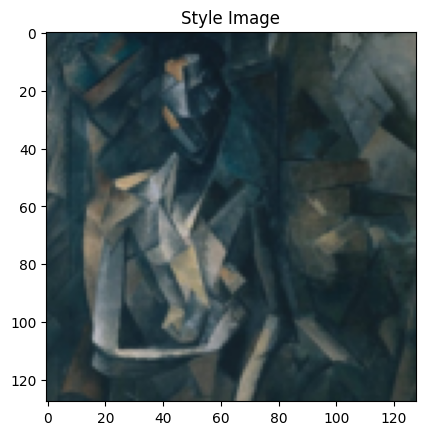

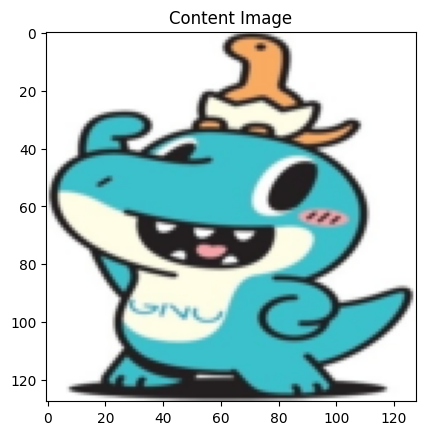

In [ ]:
plt.figure()
imshow(style_img, title='Style Image')

plt.figure()
imshow(content_img, title='Content Image')

* 사전학습 모델 불러오기
* 파이토치 문서 : <a href = "https://pytorch.org/vision/stable/models.html">링크</a>

In [2]:
cnn = models.vgg19(weights = 'VGG19_Weights.IMAGENET1K_V1').features.to(device).eval()

Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth
100%|██████████| 548M/548M [00:07<00:00, 81.6MB/s]


In [ ]:
output = run_style_transfer(cnn = cnn, content_img = content_img, style_img = style_img, input_img = input_img, normalization_mean = cnn_normalization_mean, normalization_std = cnn_normalization_std)

Building the style transfer model..


/content/transfer_image_gpu.py:113: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.mean = torch.tensor(mean).view(-1, 1, 1)
/content/transfer_image_gpu.py:114: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.std = torch.tensor(std).view(-1, 1, 1)


Optimizing..
run [50]:
Style Loss : 413.955963 Content Loss: 77.644020

run [100]:
Style Loss : 150.351807 Content Loss: 71.247223

run [150]:
Style Loss : 89.988426 Content Loss: 63.852509

run [200]:
Style Loss : 45.714001 Content Loss: 58.497353

run [250]:
Style Loss : 17.797724 Content Loss: 53.311760

run [300]:
Style Loss : 8.913626 Content Loss: 49.055027



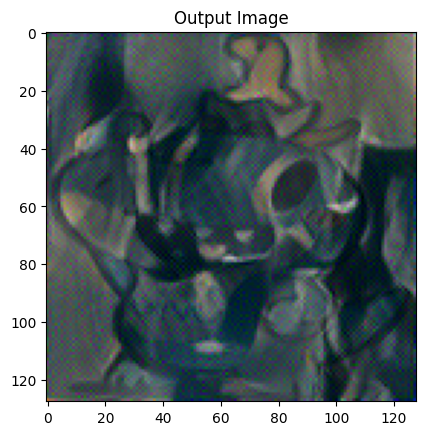

In [ ]:
plt.figure()
imshow(output, title='Output Image')

plt.ioff()
plt.show()

In [ ]:
image = output.cpu().clone()  # 텐서를 복제하여 변경하지 않음
image = image.squeeze(0)      # 가짜 배치 차원 제거
image = unloader(image)
image.save('피카소풍_지누_cpu.jpg')

# GPU 버전

In [ ]:
import torch
imsize = 512 if torch.cuda.is_available() else 128
device = "cuda" if torch.cuda.is_available() else "cpu"

cnn_normalization_mean = torch.tensor([0.485, 0.456, 0.406]).to(device)
cnn_normalization_std = torch.tensor([0.229, 0.224, 0.225]).to(device)

In [ ]:
from transfer_image import image_loader, imshow, run_style_transfer, make_sqaure_img
from torchvision import models, transforms
import matplotlib.pyplot as plt
unloader = transforms.ToPILImage()

In [ ]:
loader = transforms.Compose([
    make_sqaure_img(),
    transforms.Resize(imsize),
    transforms.ToTensor()])

style_img = image_loader("picasso.jpg", device = device, loader = loader)
content_img = image_loader("지누.jpg", device = device, loader = loader)
input_img = content_img.clone()

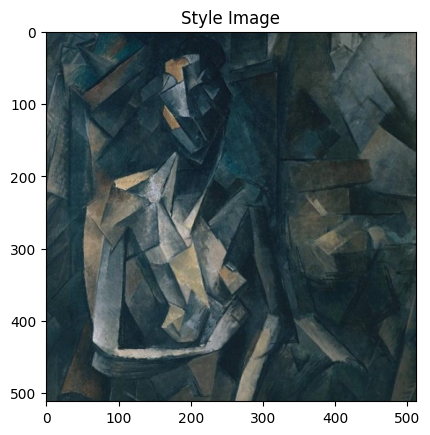

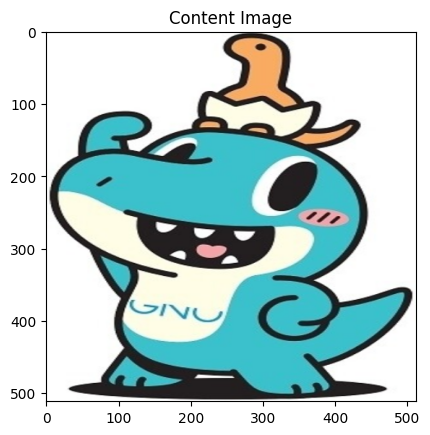

In [ ]:
plt.figure()
imshow(style_img, title='Style Image')

plt.figure()
imshow(content_img, title='Content Image')

In [3]:
cnn = models.vgg19(weights = 'VGG19_Weights.IMAGENET1K_V1').features.to(device).eval()

In [ ]:
output = run_style_transfer(cnn = cnn, content_img = content_img, style_img = style_img, input_img = input_img, device = device, normalization_mean = cnn_normalization_mean, normalization_std = cnn_normalization_std)

Building the style transfer model..


/content/transfer_image.py:111: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.mean = torch.tensor(mean).view(-1, 1, 1)
/content/transfer_image.py:112: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.std = torch.tensor(std).view(-1, 1, 1)


Optimizing..
run [50]:
Style Loss : 177.444977 Content Loss: 17.589098

run [100]:
Style Loss : 68.119331 Content Loss: 19.383297

run [150]:
Style Loss : 20.158758 Content Loss: 17.779562

run [200]:
Style Loss : 6.483451 Content Loss: 15.168509

run [250]:
Style Loss : 2.842713 Content Loss: 13.512897

run [300]:
Style Loss : 1.574711 Content Loss: 12.432821



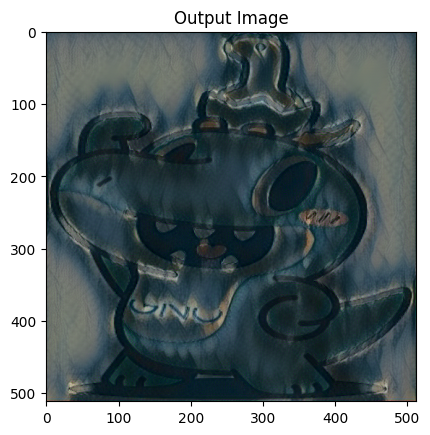

In [ ]:
plt.figure()
imshow(output, title='Output Image')

# sphinx_gallery_thumbnail_number = 4
plt.ioff()
plt.show()

In [ ]:
image = output.cpu().clone()
image = image.squeeze(0)
image = unloader(image)
image.save('피카소풍_지누_gpu.jpg')